In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
pip install pmdarima

In [17]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#https://www.youtube.com/watch?v=8FCDpFhd1zk

In [29]:
data = {'Date': ['2019-01-01', '2019-01-07', '2019-01-14', '2019-01-21', '2019-01-28', '2019-02-04','2019-02-11', '2019-02-18', '2019-02-25','2019-03-04', '2019-03-11', '2019-03-18', '2019-03-25', '2019-04-01', '2019-04-07', '2019-04-14', '2019-04-21',
                 '2019-04-28', '2019-05-05', '2019-05-12','2019-05-19','2019-05-26','2019-06-02','2019-06-09','2019-06-16','2019-06-23','2019-06-30',
                 '2019-07-07','2019-07-14','2019-07-21','2019-07-28','2019-08-04','2019-08-11','2019-08-18','2019-08-25','2019-09-01','2019-09-08','2019-09-15','2019-09-22','2019-09-29','2019-10-06','2019-10-13','2019-10-20','2019-10-27','2019-11-03',
                 '2019-11-10','2019-11-17','2019-11-24','2019-12-01','2019-12-08','2019-12-15','2019-12-22','2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19', '2019-01-26', '2020-02-02','2020-02-09', '2020-02-16', '2020-02-23',
                 '2020-03-01', '2020-03-08', '2020-03-15','2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31', '2020-06-07',
                 '2020-06-14', '2020-06-21', '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
                 '2020-10-04', '2020-10-11', '2020-10-18','2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27',
                 '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
                 '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
                 '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
                 '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26','2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
                 '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17', '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12', '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
                 '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07', '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04', '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02', '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
                 '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25','2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
                 '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
                 '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
                 '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
                 '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
                 '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
                 '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
                 '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
                 '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
                 '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
                 '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
                 '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
                 '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
                 '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22', '2020-08-23', '2020-08-24',
                 '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09',
                 '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
                 '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10', '2020-10-11',
                 '2020-10-12', '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25', '2020-10-26', '2020-10-27',
                 '2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
                 '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
                 '2020-11-29', '2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
                 '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
                 '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03','2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
                 '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
                 '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
                 '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
                 '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
                 '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04', '2021-04-05',
                 '2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
                 '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
                 '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
                 '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
                 '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
                 '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
                 '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
                 '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10', '2021-08-11',
                 '2021-08-12', '2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
                 '2021-08-28', '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-11', '2021-09-12',
                 '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
                 '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14',
                 '2021-10-15', '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-10-30',
                 '2021-10-31', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
                 '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
                 '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
                 '2021-12-18', '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01','2022-01-02',
                 '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
                 '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
                 '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19',
                 '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
                 '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
                 '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
                 '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
                 '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
                 '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
                 '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-11',
                 '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27',
                 '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13',
                 '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
                 '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14',
                 '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
                 '2022-08-31', '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
                 '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
                 '2022-10-02', '2022-10-03', '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16', '2022-10-17',
                 '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
                 '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
                 '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
                 '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15'
],
                      'Servers': [521, 1683, 2037, 974, 966, 1541, 1085, 1505, 1193, 1407, 878, 835, 593, 1184, 1265, 831, 686, 797, 1030, 1280, 1074, 618, 387, 446, 636, 548, 472, 863, 557, 904, 640, 655, 832, 606, 859,
                                  269, 839, 421, 400, 307, 535, 358, 467, 442, 324, 555, 490, 282, 357, 458, 359, 53, 142, 758,  521, 455, 438, 326, 403, 516, 443, 478, 305, 563, 340, 413, 675, 485, 180, 165, 143, 237, 295, 320, 439,
                                  448, 435, 140, 184, 326, 407, 533, 332, 244, 424, 439, 350, 226, 378, 308, 239, 303, 321, 416, 166, 357, 241, 412, 343, 90, 242, 373, 352, 181, 73, 279, 387, 523, 592, 342, 396, 1116, 375, 340, 395, 254,
                                  325, 215, 198, 405, 241, 190, 249, 201, 286, 282, 265, 185, 231, 188, 219, 217, 125, 314, 100, 216, 320, 179, 360, 167, 220, 261, 245, 245, 202, 461, 222, 189, 232, 210, 147, 47, 153, 120, 131, 57, 14,
                                  213, 217, 153, 192, 304, 152, 470, 240, 348, 197, 207, 232, 359, 291, 171, 225, 350, 211, 413, 181, 309, 185, 139, 457, 277, 362, 140, 392, 289, 234, 189, 135, 146, 246, 410, 261, 256, 234, 200, 152, 241,
                                  269, 514, 191, 213, 231, 376, 233, 331, 206, 0, 0, 81, 151, 94, 155, 264, 0, 1, 61, 107, 162, 67, 110, 13, 0, 3, 64, 66, 255, 67, 0, 0, 95, 69, 101, 112, 61, 0, 0, 45, 44, 94, 108, 35, 0, 0, 56, 53, 80,
                                  157, 57, 0, 7, 48, 163, 73, 71, 154, 0, 0, 77, 51, 53, 175, 87, 0, 0, 63, 75, 92, 135, 113, 0, 0, 125, 75, 26, 53, 25, 1, 0, 31, 83, 346, 60, 42, 1, 0, 65, 106, 69, 44, 51, 5, 0, 45, 38, 97, 112, 119, 2,
                                  6, 132, 111, 117, 264, 45, 0, 0, 68, 136, 167, 61, 53, 0, 0, 51, 31, 28, 27, 43, 0, 0, 9, 96, 23, 19, 18, 0, 0, 25, 41, 36, 30, 6, 5, 0, 16, 36, 53, 89, 43, 0, 0, 45, 48, 65, 100, 37, 0, 0, 5, 61, 22, 78,
                                  154, 0, 0, 123, 53, 39, 25, 199, 0, 235, 48, 27, 39, 41, 58, 0, 1, 184, 45, 117, 39, 49, 0, 0, 38, 8, 20, 21, 52, 1, 6, 12, 16, 86, 58, 5, 1, 0, 50, 51, 79, 104, 32, 10, 0, 69, 18, 58, 90, 172, 0, 5, 127,
                                  132, 89, 102, 75, 3, 0, 65, 18, 72, 37, 140, 0, 0, 57, 44, 35, 64, 41, 3, 0, 158, 60, 34, 87, 84, 1, 4, 41, 80, 146, 23, 145, 0, 5, 35, 119, 58, 44, 49, 40, 0, 64, 60, 26, 51, 23, 2, 0, 28, 160, 136, 22,
                                  32, 0, 0, 46, 55, 84, 24, 99, 0, 11, 56, 40, 40, 48, 39, 5, 0, 29, 119, 38, 72, 41, 4, 1, 129, 53, 51, 40, 47, 0, 0, 62, 71, 150, 75, 56, 2, 3, 17, 47, 55, 28, 16, 0, 0, 39, 77, 23, 164, 54, 0, 1, 73, 21,
                                  38, 63, 45, 0, 0, 75, 80, 60, 85, 110, 2, 0, 106, 77, 30, 63, 67, 0, 0, 57, 25, 8, 0, 0, 0, 4, 56, 57, 50, 37, 32, 6, 0, 135, 63, 41, 44, 90, 0, 0, 129, 107, 25, 48, 43, 0, 0, 28, 112, 41, 0, 0, 0, 0, 18,
                                  7, 30, 16, 2, 0, 2,74, 77, 29, 58, 39, 0, 0, 42, 32, 49, 151, 97, 16, 0, 2, 83, 103, 104, 37, 194, 1, 145, 55, 92, 114, 185, 0, 18, 100, 65, 36, 50, 73, 0, 4, 40, 106, 50, 138, 56, 2, 26, 83, 86, 779, 82,
                                  60, 0, 0, 33, 60, 76, 90, 109, 7, 0, 92, 131, 59, 25, 33, 0, 2, 102, 152, 34, 79, 26, 0, 2, 42, 44, 50, 36, 80, 0, 3, 54, 81, 58, 82, 47, 0, 1, 11, 33, 35, 60, 75, 0, 0, 74, 23, 9, 55, 36, 1, 0, 160, 21,
                                  100, 64, 60, 0, 0, 53, 57, 55, 53, 23, 0, 0, 30, 60, 20, 52, 28, 0, 0, 52, 38, 30, 94, 29, 6, 1, 50, 21, 24, 65, 40, 0, 0, 94, 66, 31, 43, 51, 1, 0, 13, 43, 37, 100, 89, 0, 0, 3, 66, 89, 25, 82, 0, 0, 64,
                                  50, 25, 30, 16, 0, 0, 45, 54, 68, 29, 27, 8, 0, 58, 36, 31, 24, 39, 0, 0, 19, 47, 30, 77, 46, 0, 1, 12, 21, 49, 52, 60, 22, 4, 32, 12, 12, 38, 27, 0, 0, 77, 73, 41, 68, 55, 0, 0, 27, 19, 8, 25, 21, 0, 12,
                                  67, 57, 45, 19, 16, 0, 0, 5, 154, 64, 54, 42, 1, 0, 52, 44, 26, 10, 47, 0, 0, 49, 107, 125, 22, 57, 0, 0, 39, 49, 23, 42, 14, 0, 0, 13, 27, 44, 108, 28, 0, 0, 116, 10, 27, 90, 18, 0, 0, 41, 65, 93, 16, 30,
                                  0, 0, 67, 45, 75, 21, 37, 0, 0, 27, 51, 70, 27, 27, 0, 0, 108, 27, 44, 90, 192, 0, 0, 69, 24, 57, 37, 35, 0, 2, 19, 38, 66, 27, 37, 0, 0, 39, 12, 118, 41, 22, 0, 0, 60, 42, 62, 14, 32, 0, 1, 21, 62, 38, 9,
                                  16, 0, 0, 5, 21, 4, 0, 17, 0, 0, 49, 67, 11, 21, 5, 0, 0, 35, 44, 21, 5, 15, 0, 0, 40, 20, 18, 39, 12, 2, 0, 24, 20, 13, 0, 0, 0, 0, 2, 8, 4, 0, 0, 0,0, 18, 82, 33, 59, 21, 0, 0, 22, 25, 79, 81, 8, 2, 0, 3,
                                  27, 82, 21, 11, 9, 0, 23, 24, 59, 46, 38, 2, 6, 58, 61, 64, 11, 104, 0, 0, 19, 45, 37, 40, 11, 0, 0, 27, 22, 344, 39, 38, 0, 0, 15, 47, 102, 31, 45, 0, 0, 94, 61, 73, 67, 53, 0, 0, 14, 35, 68, 32, 45, 3, 0,
                                  82, 30, 27, 46, 22, 0, 0, 67, 46, 39, 48, 32, 0, 0, 112, 119, 65, 37, 26, 0, 0, 48, 37, 63, 99, 43, 1, 0, 41, 28, 54, 27, 21, 0, 0, 54, 26, 13, 75, 57, 0, 0, 47, 88, 44, 134, 37, 0, 6, 27, 42, 70, 45, 17, 4,
                                  0, 51, 24, 103, 68, 167, 0, 4, 49, 32, 17, 31, 47, 1, 0, 134, 11, 74, 55, 35, 0, 0, 20, 25, 46, 41, 53, 0, 0, 28, 20, 26, 30, 35, 0, 0, 65, 113, 41, 118, 120, 0, 0, 59, 47, 27, 49, 93, 2, 0, 113, 50, 52, 108,
                                  39, 0, 0, 33, 19, 33, 28, 27, 0, 0, 59, 35, 70, 195, 31, 2, 0, 75, 16, 85, 87, 24, 2, 0, 61, 43, 56, 54, 20, 0, 0, 45, 65, 46, 19, 14, 0, 4, 19, 29, 22, 39, 22, 0, 0, 35, 17, 22, 21, 51, 0, 1, 11, 8, 87, 89,
                                  50, 0, 0, 104, 137, 42, 100, 27, 0, 0, 3, 26, 107, 40, 85, 0, 0, 65, 22, 58, 15, 96, 0, 3, 52, 24, 37, 80, 32, 6, 40, 13, 36, 17, 87, 7, 0, 0, 31, 12, 25, 59, 25, 0, 2, 21, 35, 53, 57, 73, 0, 0, 75, 48, 37,
                                  28, 81, 0, 3, 32, 124, 16, 66, 272, 1, 0, 93, 29, 34, 17, 18, 0, 0, 52, 26, 38, 91, 2, 4, 0, 49, 46, 57, 40, 37, 2, 0, 67, 29, 220, 29, 31, 0, 0, 71, 22, 56, 72, 12, 0, 5, 78, 46, 36, 84, 79, 3, 0, 105, 40,
                                  26, 35]}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(df.shape)
df.head()

(1284, 1)


,Servers
Date,
2019-01-01,521
2019-01-07,1683
2019-01-14,2037
2019-01-21,974
2019-01-28,966


<Axes: xlabel='Date'>

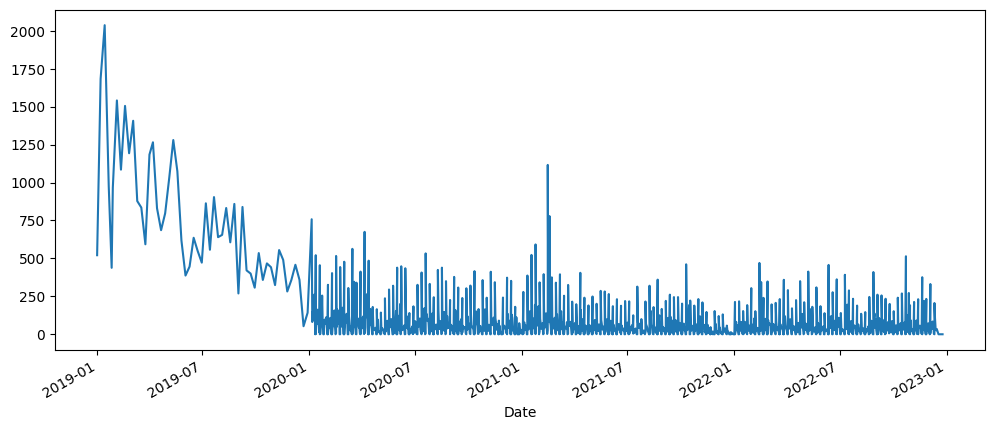

In [30]:
import matplotlib.pyplot as plt
Servers = df['Servers']
Servers.plot(figsize=(12,5))

In [31]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [32]:
ad_test(df['Servers'])

1. ADF :  -6.256108545846081
2. P-Value :  4.335032843999222e-08
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 1260
5. Critical Values :
	 1% :  -3.435550533536195
	 5% :  -2.863836575823745
	 10% :  -2.567992721718317


In [33]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [34]:
stepwise_fit = auto_arima(df['Servers'], trace=True,
suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15151.401, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15682.452, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15512.289, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15186.706, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15680.468, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15168.685, Time=1.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15157.246, Time=1.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15152.761, Time=2.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15160.075, Time=5.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15174.689, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15174.003, Time=2.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15151.842, Time=1.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15152.659, Time=1.68 sec

Best model:  ARIMA(2,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1284
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7569.701
Date:                Tue, 13 Feb 2024   AIC                          15151.401
Time:                        20:19:08   BIC                          15182.343
Sample:                             0   HQIC                         15163.018
                               - 1284                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6065      0.404     -1.503      0.133      -1.398       0.184
ar.L1          0.5682      0.066      8.574      0.000       0.438       0.698
ar.L2         -0.2236      0.014    -15.547      0.000      -0.252      -0.195
ma.L1         -1.2781      0.069    -18.599      0.000      -1.413      -1.143
ma.L2          0.4125      0.060      6.881      0.000       0.295       0.530
sigma2      7790.3401     88.567     87.960      0.000    7616.753    7963.928
===================================================================================
Ljung-Box (L1) (Q):                   2.49   Jarque-Bera (JB):             33144.07
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape,test.shape)

(1284, 1)
(1254, 1) (30, 1)


In [37]:
model=ARIMA(train['Servers'],order=(2,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Servers   No. Observations:                 1254
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -7402.058
Date:                Tue, 13 Feb 2024   AIC                          14814.116
Time:                        20:19:27   BIC                          14839.782
Sample:                             0   HQIC                         14823.764
                               - 1254                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1559      0.012     97.823      0.000       1.133       1.179
ar.L2         -0.1753      0.012    -14.420      0.000      -0.199      -0.151
ma.L1         -1.8987      0.009   -215.081      0.000      -1.916      -1.881
ma.L2          0.9100      0.009    106.624      0.000       0.893       0.927
sigma2      7899.3203     86.891     90.910      0.000    7729.016    8069.624
===================================================================================
Ljung-Box (L1) (Q):                   6.27   Jarque-Bera (JB):             35138.34
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                             2.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-11-16    38.504315
2022-11-17    36.293335
2022-11-18    35.051400
2022-11-19    34.003369
2022-11-20    33.009633
2022-11-21    32.044673
2022-11-22    31.103459
2022-11-23    30.184648
2022-11-24    29.287570
2022-11-25    28.411689
2022-11-26    27.556498
2022-11-27    26.721507
2022-11-28    25.906240
2022-11-29    25.110231
2022-11-30    24.333024
2022-12-01    23.574176
2022-12-02    22.833252
2022-12-03    22.109830
2022-12-04    21.403497
2022-12-05    20.713847
2022-12-06    20.040488
2022-12-07    19.383034
2022-12-08    18.741111
2022-12-09    18.114350
2022-12-10    17.502394
2022-12-11    16.904893
2022-12-12    16.321506
2022-12-13    15.751899
2022-12-14    15.195747
2022-12-15    14.652732
Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

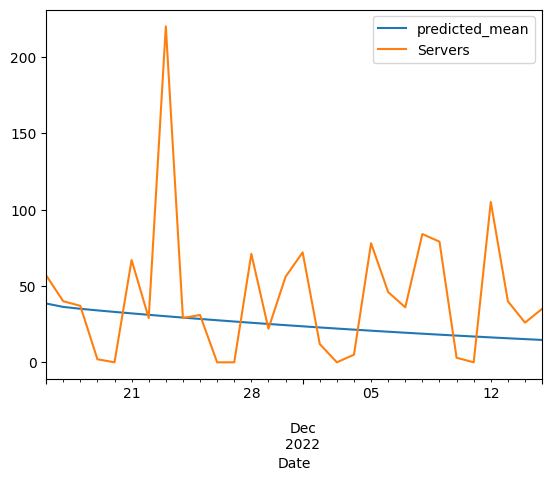

In [39]:
pred.plot(legend=True)
test['Servers'].plot(legend=True)